<a href="https://colab.research.google.com/github/prati25/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **DATASET**

The dataset contains information on bookings for two hotels in Portugal (a resort and a city hotel) scheduled to arrive in a period between July 1, 2016 and August 31, 2018.

For both hotels, the same information was collected: 31 variables describing 40,060 observations for the resort and 79,330 observations for the city hotel. That is, the dataset contains information on 119,390 hotel reservations, including those that were canceled. This is real information, so all elements that could identify hotels or customers were removed.

### Here there are some questions for analysis:

1.What is the month with the most guest arrivals?

2.How long do guests tend to stay at the hotel?

3.How many reservations were made by repeated guests?

4.What is the Average Daily Rate (ADR) throughout the year?

5.How many reservations were cancelled out of total?

6.What is the most frequent deposit type for cancelled reservations?

7.Which countries do customers come from?

8.What types of customers are most common in each hotel?

9.What is their preferred meal plan?

10.Which hotel is preferred by adults with children?

11.What is the strongest market segment and distribution channel?

## **Suppressing warnings**

In [2]:
import warnings
warnings.filterwarnings('ignore')             #suppressing warnings

## **Importing libraries**

In [3]:
#importing libraries :
#matplotlib inline is used for plotting/graphs will be displayed :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                         
%matplotlib inline 

## **Mounting drive to featch data set**

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Assign file location**

let's see Contents of Dataset :

In [5]:
File_location="/content/drive/MyDrive/Capston Project/Hotel Booking Analysis/Hotel Bookings (1).csv"
pk = pd.read_csv(File_location)

In [6]:
pk.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
print(pk.shape)


(119390, 32)


There are 119.390 observations and 32 columns in thr dataset

Check data type :

In [8]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

As it can be seen, 'reservation_status_date' has an object data type, when it should has a date data type.

Also, there are missing values in 'children', 'country', 'agent' and 'company' columns. This will be explored in the next section.

## **Data cleaning**

## Missing values

Let's see how many values are missing there :

In [9]:
# Number of missing values according to column :

pk.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [10]:
# percentage of missing values according to column :

round((pk.isnull().sum().sort_values(ascending = False) * 100) / len(pk),2)

company                           94.31
agent                             13.69
country                            0.41
children                           0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
hotel                              0.00
previous_cancellations             0.00
days_in_waiting_list               0.00
customer_type                      0.00
adr                                0.00
required_car_parking_spaces        0.00
total_of_special_requests          0.00
reservation_status                 0.00
previous_bookings_not_canceled     0.00
is_repeated_guest                  0.00
is_canceled                        0.00
distribution_channel               0.00
market_segment                     0.00
meal                               0.00
babies                             0.00
adults                             0.00
stays_in_week_nights               0.00


**'company'** and **'agent'** columns have a very high amount of missing values (94,31% and 13,69% respectively). one possible option could be to drop down that columns. However, the original article(that can be found here) 

States the following :



---
In some Categorical variables like agent or company,"NULL" is presented as one of the categories. This should not be considered a missing value, but rather as "not applicable".
For example: if a booking "Agent" is defined as "NULL" it means that the booking did not came from a travel agent. 

---


Then, I'm going to replace null values in those columns with 0 (as they have float64 data types, since the personal information was removed).

On the other hand, the column **'country'** has 0.41% missing values (488 rows affected). In its case, being a categorical variable, I have chosen the mode to replace the null values.

The column **'children'** also has some missing values, but they do not even represent 0.01% of the dataset. Therefore, I have chosen to delete the affected rows (4 rows).

In [11]:
#Replacing NULL values in company and agent columns with 0 :

values = {'company':0, 'agent':0}
pk.fillna(value = values, inplace = True)


#Replacing NULL values in country column with most frecuent value :

pk['country'].fillna(value = pk['country'].mode()[0],inplace = True)


#Removing row affected by NULL values in children column :

pk.dropna(subset = ['children'], inplace = True)


In [12]:
#Rechecking for NULL values in the data set :

pk.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Now, there is no missing values in the dataset.

## **Inconsistent Data**

In this part I'll look for inconsistent data in the dataset, that is, I'll check that the unique values of the categorical volumns are correct.

In [13]:
#Categorical columns:

categ_columns = ['hotel','is_canceled','meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']


#Unique values in each categorical column :

print(f"UNIQUE VALUES BY CATEGORICAL COLUMNS\n".upper())
for categ_columns in categ_columns:
  unique_values = pk[categ_columns].unique()
  print(f"\n{categ_columns}: \n{unique_values}\n")
  print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' '

In the column **'meal'**  there are five possible results:['BB' 'FB' 'HB' 'SC' 'Undifined']

The category **'undifined'** actually corresponds to **'sc'** (Self catering i.e. meal is not included),as definrd in the original article. Therefore, I'll replace it's value with **'sc'**.


In [ ]:
#Replacing 'Undifined' meal with 'SC' ;

pk['meal'].replace(to_replace = 'undifined', value = 'SC', inplace = True)

In [ ]:
#Rechecking unique values in meal column :

pk['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

There is no more inconsistent data in Dataset.

## **Invalid Data**

Now, Verify there are any non-logical values in the dataset :

In [14]:
pk.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000
mean,0.370395,104.014801,2016.156593,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.031913,0.087121,0.137102,0.221131,74.830633,10.775518,2.321227,101.833541,0.062520,0.571340
std,0.482913,106.863286,0.707456,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,0.175770,0.844350,1.497462,0.652315,107.142996,53.944751,17.595011,50.534664,0.245295,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.590000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


At first glance, it seems that there are outliers in the dataset. For example, we can see that the column 'previous_cancellations' has a maximum value of 26 cancellations, which would imply that some customer made 26 cancellations, which is unlikely.

On the other hand, the column 'adults' has a maximum of 55 and a minimum of 0 people. The minimum is especially interesting because it would assume that there are hotel reservations for 0 adults, which is not possible since there must be a minimum of 1 adult per reservation (obviously children cannot book hotel rooms). Therefore, I will eliminate rows where the number of adults equals 0.

In [15]:
#Dropping rows with 0 adults :

pk.drop(pk[pk['adults']== 0].index,inplace = True)

In [16]:
#Verification of dropping rows with 0 adults :

len(pk[pk['adults']==0])

0

Rows where 'adults' was equal to 0 have been eliminated. I'll now check the outliers.

## **Outliers**

Outliers are extremly large or small values relative to the other points of dataset. I'll use box plots and histograms to visualize the distribution of the data and detect outliers.

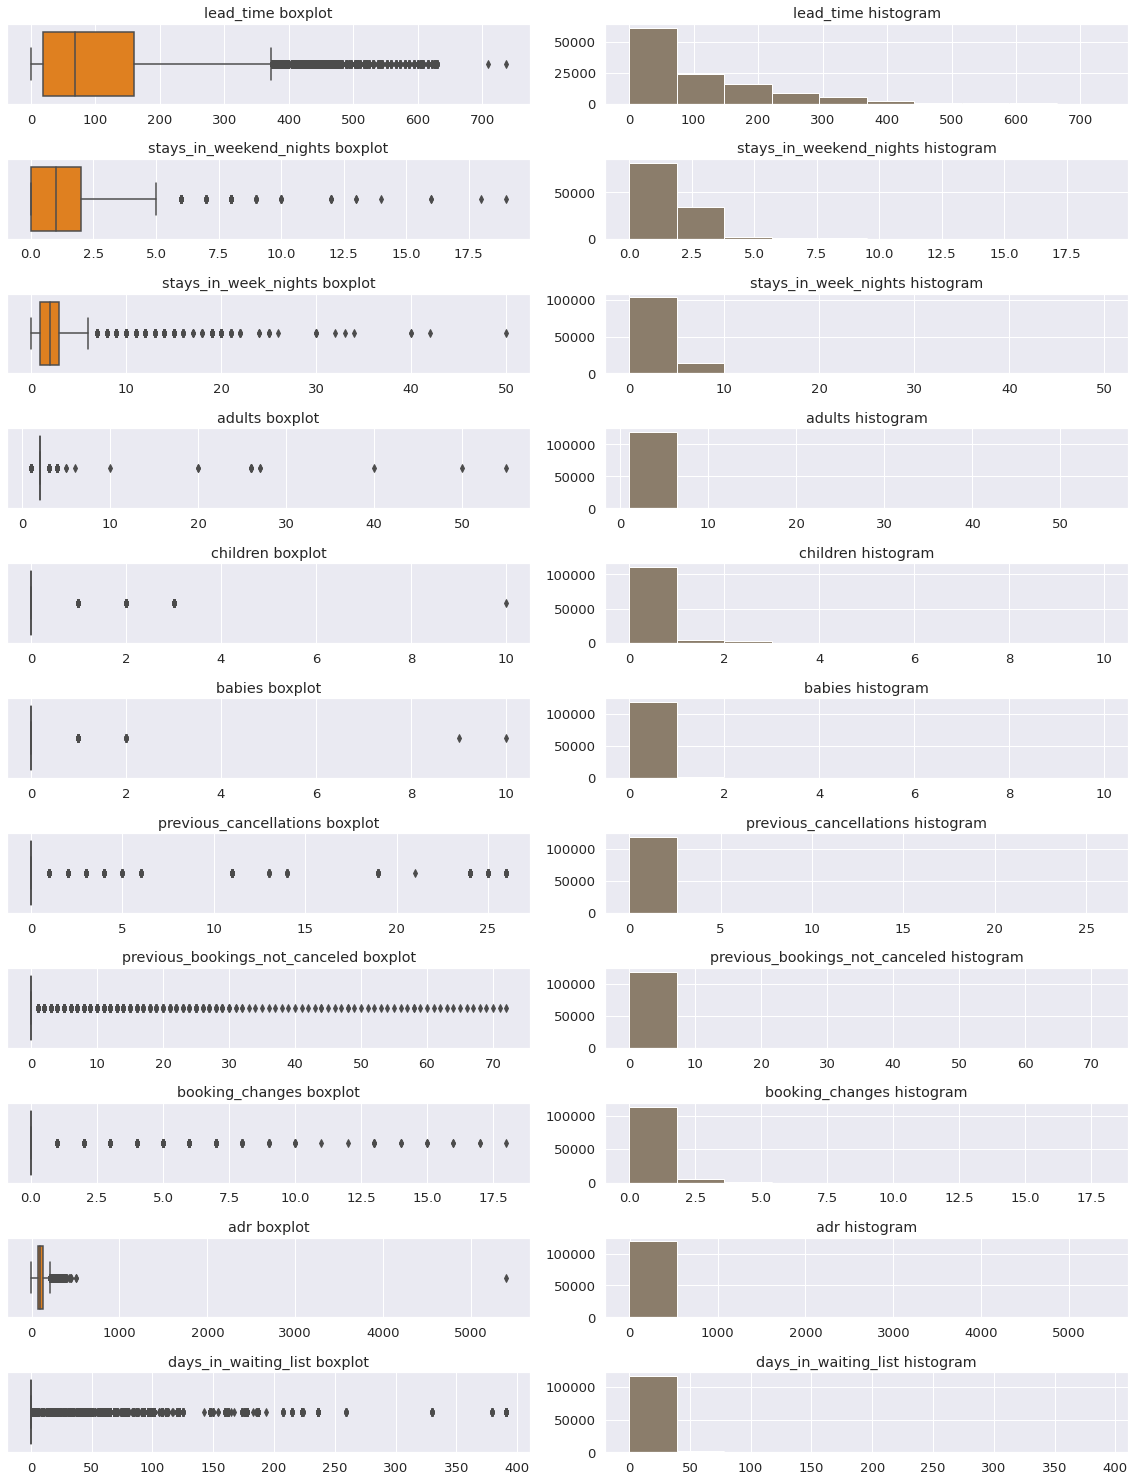

In [79]:
#According to columns from pk.describe() :

items = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','days_in_waiting_list']


#Creating a boxplot and a histogram for outlier detection :

a = 1
sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (16,28))

for item in items:
  plt.subplot(15,2,a)
  sns.boxplot(pk[item],palette = 'autumn').set(xlabel = None)
  plt.title(f'{item} boxplot')
  a = a + 1

  plt.subplot(15,2,a)
  plt.hist(pk[item],color = '#8B7D6B',)
  plt.title(f'{item} histogram')
  a = a + 1
  plt.tight_layout()

There are outliers in the dataset.What is especially relevant is their quantity and the extreme values that some of them have.

For example, in the adr column we can see an outlier with an approximate value of 5400, far away from the rest of the data points. In this case we could consider that it is an error when entering data in the database.

Nevertheless, in other columns there are outliers with values quite similar to each other. This has made me think that the problem may lie in the fact that the dataset contains data from two different hotels. Normally, city hotels are cheaper and can host more diverse types of customers (businessmen attending congresses, airline workers,...) given their centric location. On the contrary, a resort is usually a more expensive accommodation than a hotel, as it offers many more features, including larger rooms or even villas (which could explain why there are bookings with a large number of adults).

The above is conjecture, as it is not possible to know the real identity of the hotels and therefore understand their business model in depth.

However, before dealing with the outliers I will create a visualization that allows me to visualize the differences in the distribution of the data for each hotel.

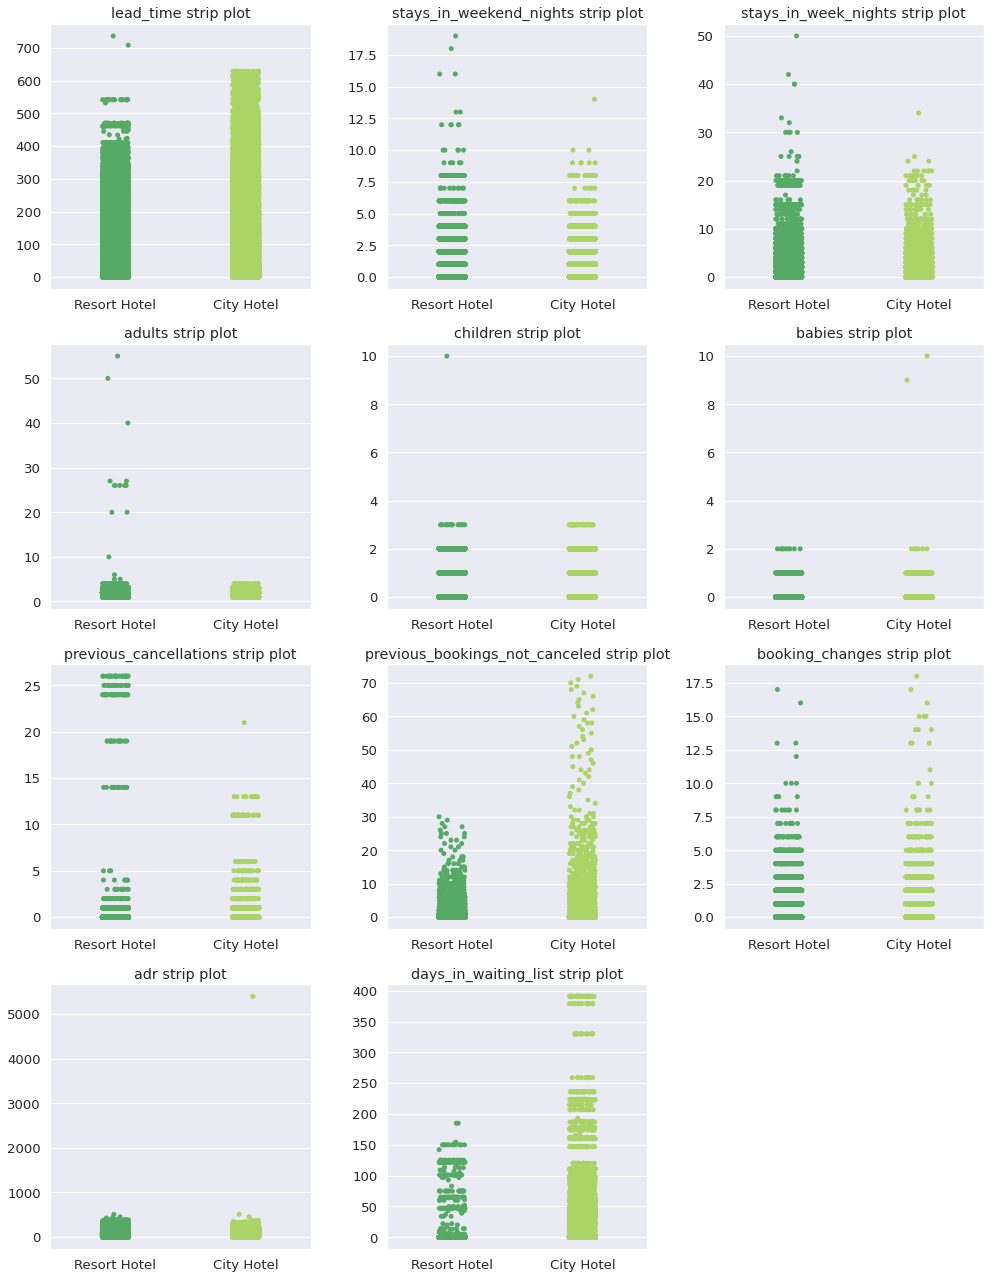

In [81]:
#Creating a stripplot to visualize differences in data distribution between hotels :

items = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','days_in_waiting_list']
a = 1 

sns.set_style('darkgrid')
sns.set(font_scale = 1.2)
plt.figure(figsize = (14, 18))

for item in items:
  plt.subplot(4,3,a)
  sns.stripplot(x = pk['hotel'],y = pk[item], palette = 'summer').set(xlabel= None, ylabel = None)
  plt.title(f'{item} strip plot')
  a = a + 1
  plt.tight_layout()

In the lead_time column the data start to become more dispersed starting at the 400 value, approximately.

The stays_in_weekend_nights and stays_in_week_nights columns show higher outliers for the resort than for the city hotel, although both hotels start to show more dispersed data at 6 and 10 days, for each column.

In the case of the number of adults per reservation, it is clear that the outliers are only for the resort, as the distribution for the city hotel is not very dispersed. Therefore, it could be true that the resort we are studying has villas or offers services to large groups of guests, which would explain why there are reservations for a large number of adults. However, we still do not know what type of rooms the hotel has (as they are classified with letters to anonymize the data) so we cannot reach a conclusion on this basis. The only thing we can state is that the data are concentrated, for both hotels, between values 1 and 4, being unusual any reservation that exceeds this number.

In the children and babies columns we can see three data points with very high values, enough to think that it could be an error when entering the booking data.

The booking_changes variable has a similar distribution for both hotels, seeing that it is extremely unusual for a booking to make more than 5 changes.

As I said before, the adr (Average Daily Rate) variable has an outlier with a particularly high value for the city hotel. Since this could be an error, it would be better to remove it.

The days_in_waiting_list column refers to the number of days that elapsed from the time the reservation was made until it was confirmed to the client. According to the strip plot, the data is very sparse, being unusual for a reservation to have a waiting period of more than 1 day, practically.

Finally, in the previous_cancellations and previous_bookings_not_canceled columns we can see the number of reservations, previous to the current one, that were or were not canceled by the client. According to the graph, we can see that these variables reach very high values. For example, in the resort, there are records in which the customer made more than 20 cancellations prior to the current booking.

At first it seems an illogical value. Exploring the dataset, we can find that most of these reservations were made by companies. Each time the same company rebooks, one of the two variables increases (depending, of course, on whether the previous booking was cancelled or not). Therefore, the high value of these variables could be explained by the presence of companies that regularly use these hotels to accommodate their employees.

However, it is also observed that there are bookings made by individuals where these variables reach high values. We can see this, for example, if we calculate the percentage of bookings made by companies and individuals, where the previous_bookings_not_canceled column has a value greater than 10 for the Resort.

In [76]:
#Number of bookings that have more than 10 previous bookings not canceled for resort :

high_pre_book = len(pk[(pk['previous_bookings_not_canceled'] > 10) & (pk['hotel'] == 'Resort Hotel')])


#Number of Bookings made by companies that had more than 10 previous bookings not canceled for resort :

high_comp_pre_book = len(pk[(pk['previous_bookings_not_canceled'] > 10) & (pk['company'] > 0) & (pk['hotel'] == 'Resort Hotel')])


#Number of bookings made by private individuals that had more than 10 previous bookings not canceled for resort :

high_indi_pre_book = len(pk[(pk['previous_bookings_not_canceled'] > 10) & (pk['company'] == 0) & (pk['hotel'] == 'Resort Hotel')])


#Percentage of companies and individuals that had more than 10 previous cancellations for the resort :

high_percent_pre_book = round((high_comp_pre_book / high_pre_book) * 100 , 2)
high_indi_pre_book_percent = round((high_indi_pre_book / high_pre_book) * 100,2)

print(f"\nBookings with high values in the previous_bookings_not_canceled column for the Resort Hotel :\n")
print(f"\t{high_percent_pre_book} % were made by companies.")
print(f"\n\t{high_indi_pre_book_percent} % were made by private individuals.")



Bookings with high values in the previous_bookings_not_canceled column for the Resort Hotel :

	70.89 % were made by companies.

	29.11 % were made by private individuals.


Bookings with high values in the previous_bookings_not_canceled column for the Resort Hotel:

	70.89 % were made by companies.

	29.11 % were made by private individuals.
Hence, it would be incorrect to assume that all the outliers in these columns are due to the fact that they are bookings made by companies that use the services of these hotels on a regular basis. Consequently, I have decided that it is best to convert these variables into categorical variables, where 0 means that the client did not cancel or enjoy a reservation at the hotel prior to the current reservation and 1 means that it did occur, at least once.

Having analyzed all the columns of the graph, I will now deal with the outliers.

# **EDA (Exploratory Data Analysis)**

## **Hotel type in graph :**

In [25]:
pk.hotel.value_counts(normalize = True)

City Hotel      0.663423
Resort Hotel    0.336577
Name: hotel, dtype: float64

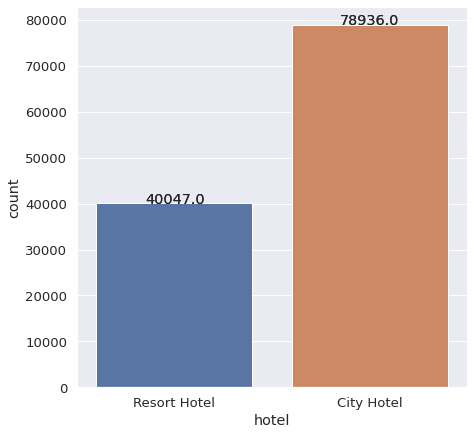

In [37]:
#The hotel type count in grapth :

plt.figure(figsize=(7,7))
sns.countplot(pk['hotel'], palette = 'husl')
xa = sns.countplot(x = "hotel", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))
plt.show()

## **Cancelled Booking :**

In [32]:
#Counting the Total Bookings cancelled:
#Counting percentage of Cancelled bookings:

print('Total Bookings Cancelled:')
print(pk.is_canceled.value_counts())
print('Cancelation Percentage:')
print(pk.is_canceled.value_counts(normalize = True))

Total Bookings Cancelled:
0    74872
1    44111
Name: is_canceled, dtype: int64
Cancelation Percentage:
0    0.629266
1    0.370734
Name: is_canceled, dtype: float64


During This Year, Cancelled Bookings percentage is **37.07%**.

**Plot this result in grapth :**

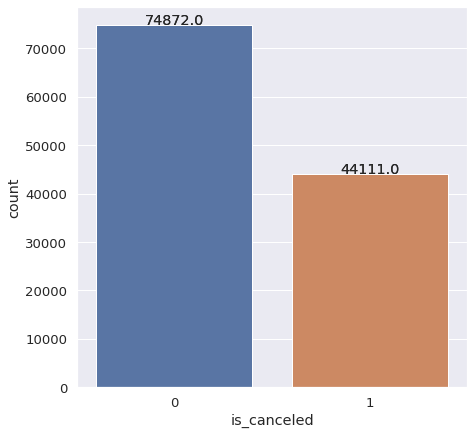

In [36]:
# Here we use, Canceled = 1 , Not canceled = 0 :

plt.figure(figsize=(7,7))
sns.countplot(pk['is_canceled'], palette = 'husl')
xa = sns.countplot(x = "is_canceled", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))
plt.show()

## **Average Daily Rate (ADR) :**

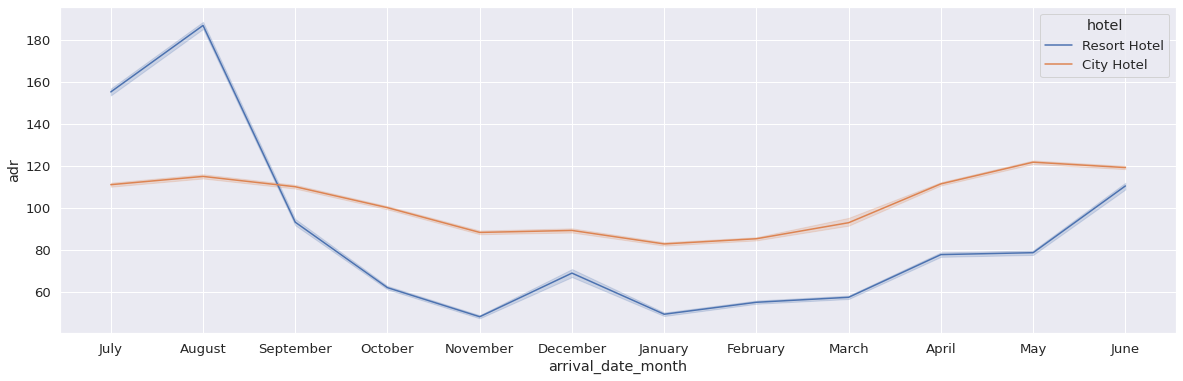

In [48]:
#Dividing The Sum og all lodging transactions by the total no of staying nights :

plt.figure(figsize = (20,6))
sns.lineplot(x='arrival_date_month', y= 'adr', hue= 'hotel', data= pk)
plt.show()

**In Resort Hotel** : According to graph, we can see that Average Daily Rate is more in june,july and Augyst.

**In City Hotel** : According to graph, we can see that Average Daily Rate is more in May, June, July, August. 

## **Check The Arrival Date By Month :**

In [49]:
pk.arrival_date_month.value_counts(normalize = True)

August       0.116193
July         0.105990
May          0.098871
October      0.093551
April        0.092929
June         0.091753
September    0.088155
March        0.081953
February     0.067522
November     0.056857
December     0.056613
January      0.049612
Name: arrival_date_month, dtype: float64

**Plot this result in graph :**



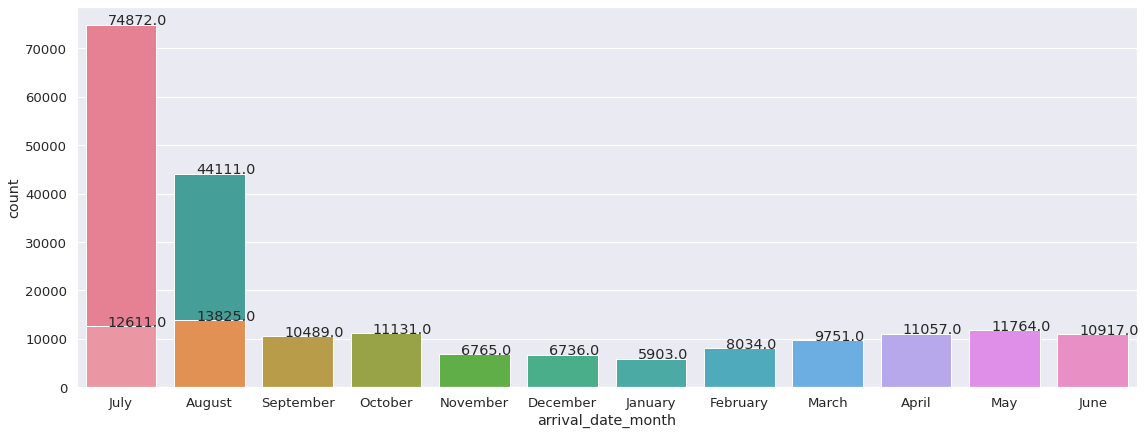

In [73]:
# Check Arrival Date By Month in Graphs :

plt.figure(figsize=(19,7))
sns.countplot(pk['is_canceled'], palette = 'husl')
xa = sns.countplot(x = "arrival_date_month", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))
plt.show()



## **Market Segment :**

Let's check the market segment. 

 In categories, the term **TA means Travel Agents and TO means Tour Operators**

In [51]:
pk.market_segment.value_counts(normalize = True)

Online TA        0.472504
Offline TA/TO    0.203214
Groups           0.166335
Direct           0.105494
Corporate        0.044393
Complementary    0.006085
Aviation         0.001975
Name: market_segment, dtype: float64

**Plot this result in graph:**



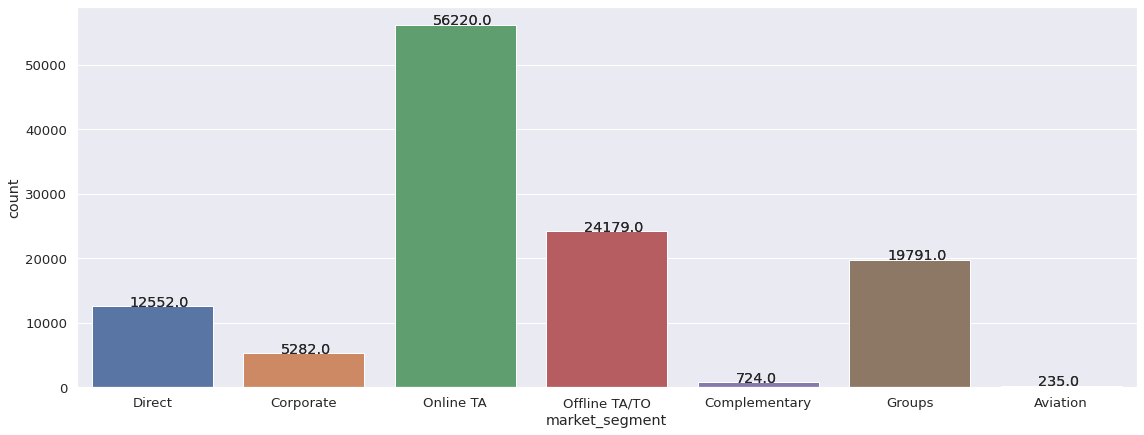

In [54]:
plt.figure(figsize=(19,7))
sns.countplot(pk['market_segment'], palette = 'husl')
xa = sns.countplot(x = "market_segment", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.90))
plt.show()


**Plot this result in Pie chart:**

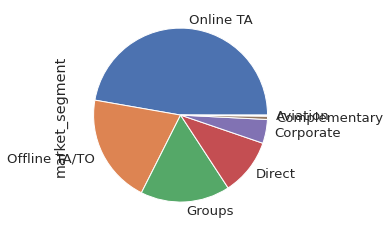

In [55]:
#Pie chart of market segment :

pk.market_segment.value_counts(normalize = True).plot.pie()

## **Year of Arrival Date**

In [56]:
#year of arrival date :

pk.arrival_date_year.value_counts(normalize = True)

2016    0.474673
2017    0.340864
2015    0.184463
Name: arrival_date_year, dtype: float64

**Plot this result in graph:**

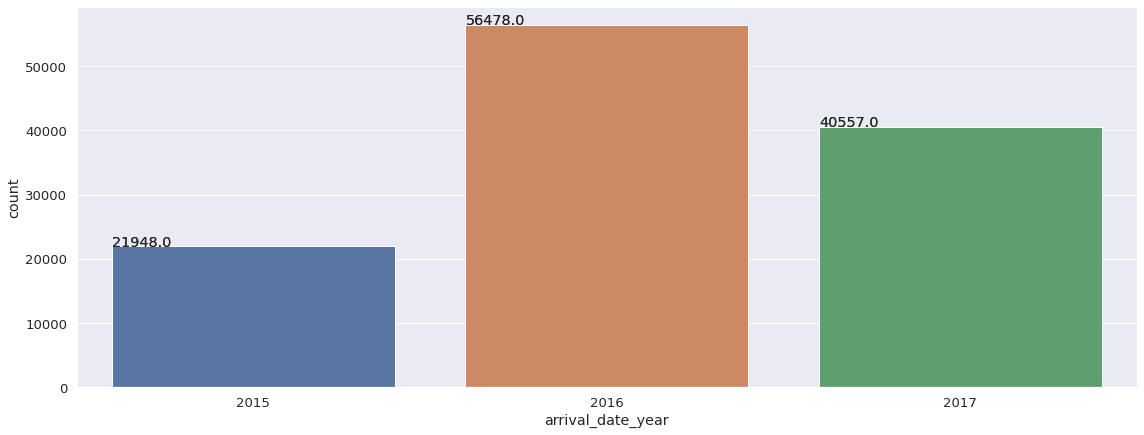

In [61]:
plt.figure(figsize=(19,7))
sns.countplot(pk['arrival_date_year'], palette = 'husl')
xa = sns.countplot(x = "arrival_date_year", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0., p.get_height()+0.90))
plt.show()


**Plot this result in pie chart:**

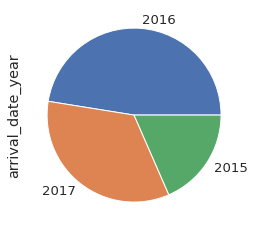

In [58]:
pk.arrival_date_year.value_counts(normalize = True).plot.pie()

## **Customer Type**

there are four categories in customer type:

1)**Contract** - when the booking has an allotment or other type of contract associated to it;

2)**Group** – when the booking is associated to a group;

3)**Transient** – when the booking is not part of a group or contract, and is not associated to other transient booking;

4)**Transient-party** – when the booking is transient, but is associated to at least other transient booking

In [59]:
#There are four customer types in hotel as shown in below:

pk.customer_type.value_counts(normalize = True)

Transient          0.750838
Transient-Party    0.210131
Contract           0.034215
Group              0.004816
Name: customer_type, dtype: float64

**Plot this result in graph :**

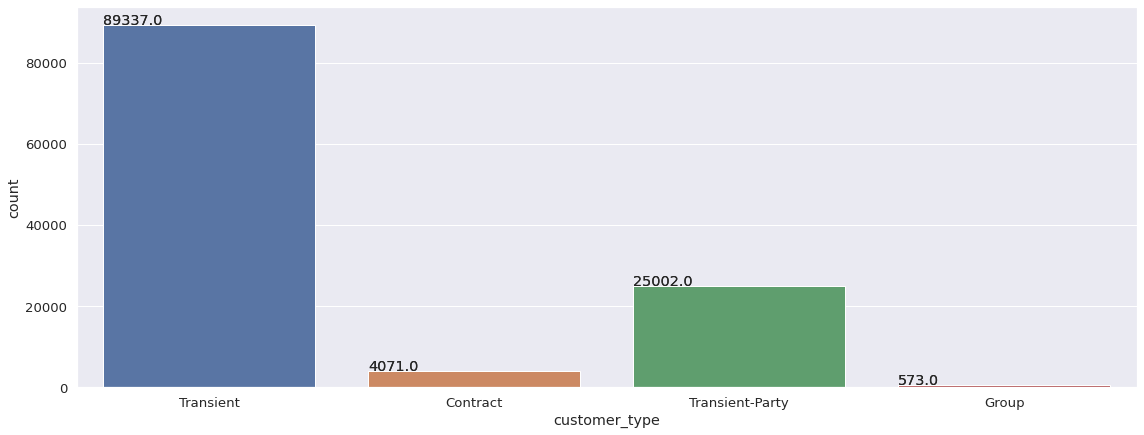

In [62]:
plt.figure(figsize=(19,7))
sns.countplot(pk['customer_type'], palette = 'husl')
xa = sns.countplot(x = "customer_type", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0., p.get_height()+0.90))
plt.show()


**Plot this result in Pie chart :**

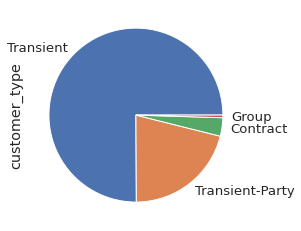

In [63]:
pk.customer_type.value_counts(normalize = True).plot.pie()

## **Distribution Channel**

In [64]:
#TA means Travel Agents and TO means Tour Operators:


pk.distribution_channel.value_counts(normalize = True)


TA/TO        0.819949
Direct       0.122522
Corporate    0.055899
GDS          0.001622
Undefined    0.000008
Name: distribution_channel, dtype: float64

**Plot this result in graph :**

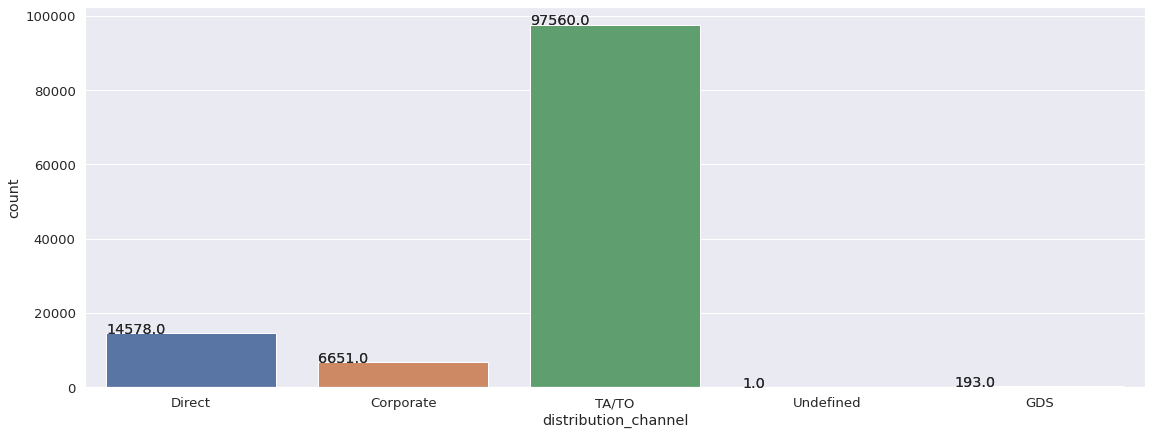

In [65]:
plt.figure(figsize=(19,7))
sns.countplot(pk['distribution_channel'], palette = 'husl')
xa = sns.countplot(x = "distribution_channel", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0., p.get_height()+0.90))
plt.show()


**Plot this result in pie chart :**

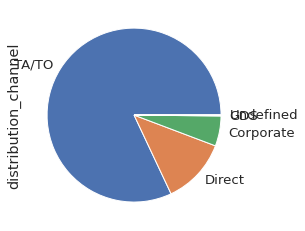

In [66]:
pk.distribution_channel.value_counts(normalize = True).plot.pie()


## **Repeated Guest**

In [69]:
#count of repeated guests in hotel:

pk.is_repeated_guest.value_counts(normalize = True)


0    0.968449
1    0.031551
Name: is_repeated_guest, dtype: float64

**Plot this result in graph :**

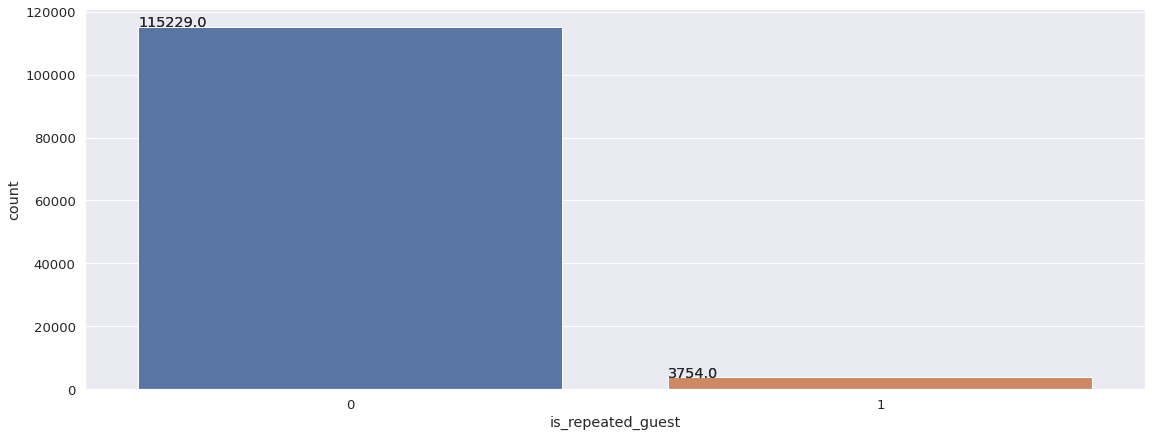

In [70]:
#count of repeated guests in graph format :

plt.figure(figsize=(19,7))
sns.countplot(pk['is_repeated_guest'], palette = 'husl')
xa = sns.countplot(x = "is_repeated_guest", data = pk)
for p in xa.patches:
  xa.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0., p.get_height()+0.90))
plt.show()


**Plot this result in pie chart :**

Name of booking was from a repeated guests list 

If guest repeated 1 and not repeated 0 




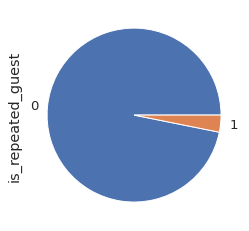

In [71]:
#count of repeated guests in pie chart format :

pk.is_repeated_guest.value_counts(normalize = True).plot.pie()
